In [1]:
import pandas as pd #make data-frames and summarise data
import numpy as np #manipulate multi-dimensional arrays
import os as os #file system read
import matplotlib.pyplot as plt #visualisation
import seaborn as sns
from scipy import stats #stats tests
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind 
from scipy.stats import fisher_exact

In [2]:
ecmodf_norm = pd.read_csv('ecmodf_norm_manualedits.csv', index_col=0)

In [3]:
ecmodf_norm.head()

,age,bmi,ed_v,v_vv,sofa,pfr,pco2,pplat,lymph,nlrat,pct,ferritin,crp,fib,ddim,cluster
id,,,,,,,,,,,,,,,,
1,46,34,3.0,2,4,48.750000,6.0000,29.00,0.4,24.0,0.800000,1609,306,7.2,10.3,2
2,34,37,6.0,1,4,76.500000,9.8918,29.36,0.5,31.2,12.336727,115,217,4.1,80.0,2
3,66,26,6.0,1,10,61.578947,7.5500,28.00,0.3,19.3,6.290000,5534,409,7.1,80.0,2
4,34,36,0.0,2,6,72.187500,7.1000,30.00,1.9,9.6,1.210000,267,388,7.1,7.4,1
5,53,42,1.0,2,12,80.833333,9.3000,31.00,0.8,7.4,100.000000,6023,665,5.9,73.3,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A3A108948>,
      dtype=object)

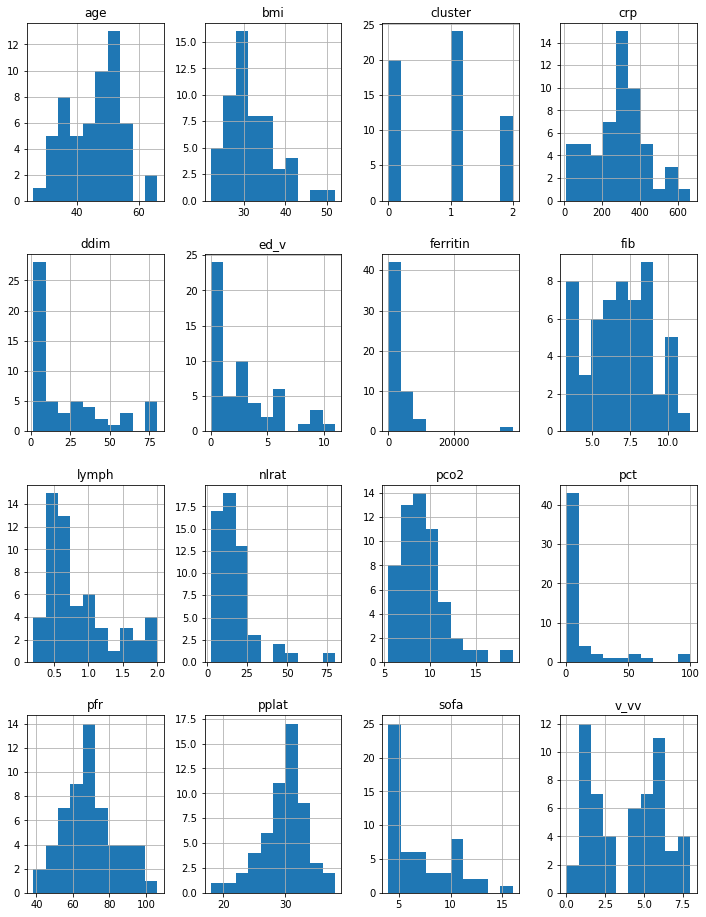

In [4]:
ecmodf_norm.hist(layout=(4,4), figsize=(12,16)) #visual normality check

In [5]:
ecmodf_norm['ddim'] = np.log(ecmodf_norm['ddim']) #log conversion of skewed variables - days and sofa not included as would not expected to conform to a power law distribution
ecmodf_norm['ferritin'] = np.log(ecmodf_norm['ferritin'])
ecmodf_norm['pct'] = np.log(ecmodf_norm['pct'])
ecmodf_norm['nlrat'] = np.log(ecmodf_norm['nlrat'])

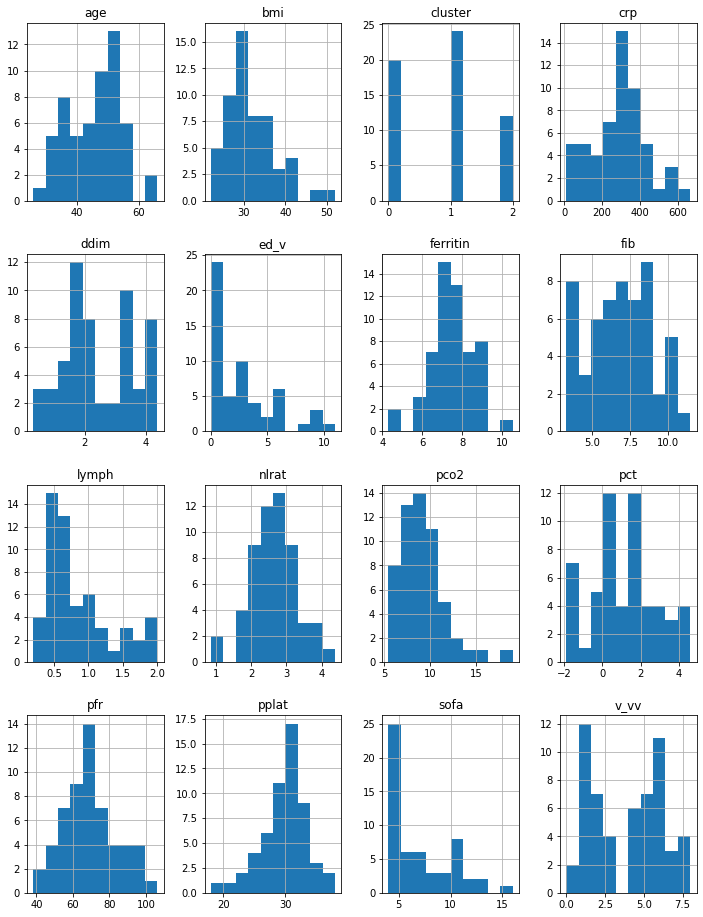

In [9]:
ecmodf_norm.hist(layout=(4,4), figsize=(12,16)) #visual normality check

ecmodf_norm.to_csv(r'ecmodf_norm1.csv', header=True)

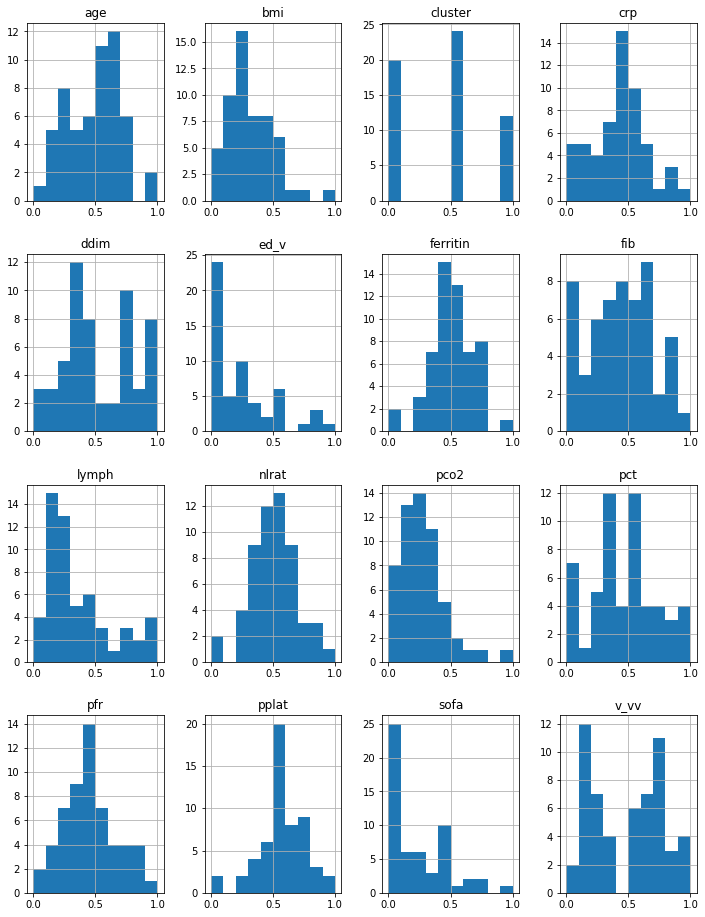

In [10]:
normalize = preprocessing.MinMaxScaler()
ecmodf_normalized = normalize.fit_transform(ecmodf_norm)
ecmodf_normalized = pd.DataFrame(ecmodf_normalized)
ecmodf_normalized.index = ecmodf_norm.index
ecmodf_normalized.columns = ecmodf_norm.columns
ecmodf_normalized.hist(layout=(4,4), figsize=(12,16)) #visual normality check

ecmodf_normalized.to_csv(r'ecmodf_norm.csv', header=True)